# Exploring racial disparities in police killings in the US

#### Pradeep Prabhakar(prdp1992@uw.edu) MSDS, UW

## Table of Contents

* [Introduction](#introduction)
* [Data](#data)
* [Background and Related Work](#background)
* [Research questions or hypotheses](#researchquestions)
* [Methodology](#methodology)
* [Data preparation](#dataprep)
* [Analysis and Findings](#findings)
* [Discussion](#discussion)
* [Conclusion](#conclusion)
* [References](#ref)

## Introduction <a class="anchor" id="introduction"></a>

<p style='text-align: justify;'> 
   The issue of racial bias in policing in the US has been a widely discussed and debated topic over the past few years in the US. The use of excessive force that resulted in the death of George Floyd in May, 2020 triggered protests across the globe and reignited the Black Lives Matter movement that called for various measures ranging from law enforcement reforms to defunding the police departments.  While data unavailability on police encounters and killings has posed major challenges to making policy reforms in the past, significant progress has been made in the past 5 years, thanks to the efforts of journal institutions like the Washington post, independent researchers and crowdsourcing databases. Setting aside my preconceived notions and opinions, analyzing the data firsthand to understand how these police killings affect different racial/ethnic groups is an impactful exercise as it has a strong human-centered outlook. </p>
<p style='text-align: justify;'>
My analysis therefore looks at the police killings in the US between 2013 and 2019, explores racial disparities, if any, in these killings and its impact on different racial and ethnic groups at a nation and state level.  Any insights on racial inequality in these killings will serve as an evidence that will support policy reforms around training and hiring of law enforcement officers, thereby resulting in reduced number of fatalities among both civilians and police officers. </p>

## Data <a class="anchor" id="data"></a>

In order to understand the effect of police killings on different racial groups in the US, I will be using the following data sources:

* [mappingpoliceviolence.org](https://mappingpoliceviolence.org/aboutthedata) – a research collaborative that collects comprehensive data on police killings nationwide in the US (7,642 killings between 2013 and 2019). Mapping police violence meticulously sources information from the three largest, most comprehensive, and impartial crowdsourced databases on police killings in the country: [FatalEncounters.org](https://fatalencounters.org/), the [U.S. Police Shootings Database](http://homicidecenter.org/services/resources/police-shootings/) and [KilledbyPolice.net](https://killedbypolice.net/). Any case where a person dies as a result of being shot, beaten, restrained, intentionally hit by a police vehicle, pepper sprayed, tasered, or otherwise harmed by police officers, whether on-duty or off-duty is defined as a police killing in the database.

    Following is a sample set of attributes found in the police killings data

| Attributes                                                                        |
|-----------------------------------------------------------------------------------|
| Victim's name                                                                     |
| Victim's age                                                                      |
| Victim's gender                                                                   |
| Victim's race                                                                     |
| Date of Incident (month/day/year)                                                 |
| Street Address of Incident                                                        |
| City                                                                              |
| State                                                                             |
| Zipcode                                                                           |
| County                                                                            |
| Agency responsible for death                                                      |
| Cause of death                                                                    |
| A brief description of the circumstances surrounding the death                    |
| Criminal Charges                                                                  |
| Unarmed/Did Not Have an Actual Weapon                                             |
| Alleged Weapon                                                                    |
| Geography                                                                         |

  While the license for the datasets are not explicitly mentioned on the website, [texts](https://mappingpoliceviolence.org/) on the website suggest that they are available for public/academic usage:
  > "*Researchers and journalists have utilized Mapping Police Violence data to expand our collective understanding of how police violence impacts communities and how to address it*. "

* [US Census Bureau](https://www.census.gov/en.html) – provides population estimates by race and ethnicity at a nation and state level

* [Uniform Crime Reporting](https://www.fbi.gov/services/cjis/ucr/) - The FBI’s Uniform Crime Reporting (UCR) program collects arrest data on 28 offenses for each year and provides summary by race and ethnicity

* [State abbreviations](https://worldpopulationreview.com/states/state-abbreviations) - Provides state code to state name mapping for the 50 states and District of Columbia

## Background and related work <a class="anchor" id="background"></a>

About ~1000 civilians are killed each year by law enforcement officers in the United States. Given the importance of data, databases such as Fatal Encounters, Mapping Police Violence and The Washington Post’s Fatal Force project have tracked the killings year after year. Many works have been conducted in the past that looked for patterns in the police killings across different races and ethnic groups. The article from [J.Nix et al.](https://onlinelibrary.wiley.com/doi/abs/10.1111/1745-9133.12269) analyzed 990 police shootings compiled by *The Washington Post* in 2015 for evidence of implicit bias, and the [mapping fatal police violence](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7313728/) article analyzed police killings from *Fatal Encounters* for overall rates of police violence across the US as well as racial inequities. The article in [nature](https://www.nature.com/articles/d41586-019-02601-9) talks about how racial biases play into deadly encounetrs with the police. A recent analysis from [FiveThirtyEight](https://fivethirtyeight.com/features/police-are-killing-fewer-people-in-big-cities-but-more-in-suburban-and-rural-america/) observed that police are killing fewer people in big cities, but more in suburban and rural America. [Cesario et al.](https://journals.sagepub.com/doi/pdf/10.1177/1948550618775108?casa_token=_N3odsRI6hgAAAAA:xgFM5qlG8_Adnt71zigWl5lllYtyDTTRgnUC_MZ84ACGqNVWGW-IecS1b29udyyDF4_-qq7gOOf2), in their study analyzed fatal police shootings for an evidence of Black-White disparity, if any, by benchmarking on crime rate estimates. The study found no systematic evidence of anti-Black disparities in fatal shootings, fatal shootings of unarmed citizens, or fatal shootings involving misidentification of harmless objects. 

## Research questions or hypotheses <a class="anchor" id="researchquestions"></a>

My analysis will attempt to answer the following research questions

**1. Are individuals in minority racial/ethnic groups likely to be killed by the police disproportionately?** 
  * *Null Hypothesis: Rate of police killings across the races are consistent with the rate of crime arrests across the races* 
        
    Contrary to the usual method of using population estimates as a benchmark, [Cesario et al.](https://journals.sagepub.com/doi/pdf/10.1177/1948550618775108?casa_token=_N3odsRI6hgAAAAA:xgFM5qlG8_Adnt71zigWl5lllYtyDTTRgnUC_MZ84ACGqNVWGW-IecS1b29udyyDF4_-qq7gOOf2), in their study used arrests estimates as a benchmark and justified this with the following argument:
        
   >*In terms of understanding racial disparities in death by police gunfire, adjusting raw shooting values by population proportions necessarily requires that White and Black citizens are equally likely to occupy situations in which deadly force is used. If this assumption does not hold, then adjusting raw fatal shooting data for overall population values is in error*  

    This prompted me to use arrests data as the benchmark as I believe this is an appropriate measure, as is also evident in the data

**2. Are individuals in minority racial/ethnic groups likely to be killed by the police disproportionately when unarmed during an encounter?**
   * *Null Hypothesis: Rate of police killings involving unarmed victims across races are consistent with the rate of overall police killings across the races*
        
        Being a police officer is extremely difficult as they have to make split second decisions especially during encounters where the suspect is allegedly armed. However, when unarmed, the police have the complete control and fatal killings in such instances could be avoided and is a better indicator to examine the presence of any racial disparities. 
        
**3. Are individuals in minority racial/ethnic groups disproportionately killed by the police across the states?**
   * Which states exhibit a high degree of racial disparity in police killings, if any?


## Methodology <a class="anchor" id="methodology"></a>

**1. Are individuals in minority racial/ethnic groups likely to be killed by the police disproportionately?**

   * The police killings data along with the arrests summary was used to answer this research question. The input excel files required some extensive preprocessing and transformation necessary to carry out the analysis, for which pandas and numpy libraries were used. The columns in both the input dataframes were cleaned to remove any special characters and were appropriately renamed.
   * The police killings data was filtered from 2013 Jan to 2019 Dec, and any killing for which the race was blank or *Unknown* was excluded from the analysis. For the arrests data, 2019 estimates were used. Since Hispanic is considered as an ethnicity and not a race, UCR's data for the 5 races includes Hispanic population as well, along with numbers for Hispanic vs. Non Hispanic. To ensure that Hispanic population is removed from the 5 races, the actual arrests counts were not used for the 5 races and instead the Non-Hispanic arrest counts were apportioned to them based on the arrests distribution
   * Once we transformed the data, matplotlib and searborn were used to perform exploratory analysis that supported the question
   * In order to carry out the hypothesis testing, Chi-square goodness of fit test will be used that will tell us if the actual distribution of killings (counts) are significantly different from what we would expect the distribution to be based on the arrests data. Since we have two sets of distibution and both meet the two criteria of independence and sample cell counts of atleast 5, chi-square is the most appropriate test to test our hypothesis. A significant p-value would likely indicate racial bias in the police killings. The [scipy.stats.chisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) function from the scipy library will be used to conduct the test.

**2. Are individuals in minority racial/ethnic groups likely to be killed by the police disproportionately when unarmed during an encounter?**

   * The 'Unarmed/Did Not Have an Actual Weapon' along with the 'victim's race' attribute was used to answer this research question. Among the four values, 'Vehicle' and 'Unclear' were excluded from the test and only killings where the victim was either - 'Allegedly Armed' or 'Unarmed/Did Not Have an Actual Weapon' were used. 
   * If the likelihood of an individual being killed by a police unarmed is independent of race, we should expect the victim counts to be consistent with that of the overall distribution(Armed+Unarmed counts) across the races. A significant deviation here would indicate a likely racial disparity. Once again, Chi-square goodness of fit test will be used to test the hypothesis. Since the cell counts for 'Pacific Islander' was less than 5, it was grouped along with 'Native American' as others in order to carry out the test.


**3. Are individuals in minority racial/ethnic groups disproportionately killed by the police across the states?**

   * The police killings data along with 2019 population estimates from US Census was used to answer this research question. Since the police killings has only state code, a state mapping file was used to obtain the corresponding state names. The census data was aggregated by race and ethnicity for each state (including District of Columbia) to obtain the final estimates for the 6 races(including Hispanic). 
   * To carry out a fair comparison across the states and races, the *victim rate per million people per year* metric was calculated and used, as it helps to do an objective comparison on states and races with varying population numbers. To identify states with the largest Black-White disparity, the difference in victim rate was calculated, and the subsequent exploratory analysis was carried out using matplotlib and seaborn

## Data preparation <a class="anchor" id="dataprep"></a>

The data preparation step involves a series of data pre-processing and transformation tasks that help us prepare the data in the format suitable to carry out the analyses.

We start off by importing the standard packages such as pandas, numpy for data preprocessing, matplotlib and seaborn for data visualization, datetime for date manipulations and chisquare from scipy.stats to test the null hypothesis

In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import chisquare

%matplotlib inline

We read the input data files in excel and csv formats using built-in pandas functions. Note that the police killings excel file has multiple sheets and we are interested only in the first sheet. The arrests excel file has additional header and footer information which are appropriately stripped off while reading the file.

In [337]:
killings = pd.read_excel("data/MPVDatasetDownload.xlsx",sheet_name="2013-2020 Police Killings",dtype={'Zipcode':'str'})

arrests = pd.read_excel("data/table_43a.xls",sheet_name="19tbl43a",skiprows=6, skipfooter=4)

census_est = pd.read_csv('data/sc-est2019-alldata6.csv')

state_mapping = pd.read_csv('data/states_mapping.csv')

#### Preprocessing on killings data

We check the first 5 rows of the killings data to get a sense of the column names, data types and missing values, if any

In [338]:
killings.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
0,Pedro Martinez,66,Male,Hispanic,NaN,2020-11-18,NaN,Tyler,TX,NaN,...,Allegedly Armed,unknown weapon,other,not fleeing,no,6321.0,NaN,NaN,NaN,NaN
1,James Horton,42,Male,NaN,NaN,2020-11-17,NaN,Hart County,KY,NaN,...,Allegedly Armed,gun,attack,other,no,6322.0,NaN,NaN,NaN,NaN
2,Dustin James Acosta,28,Male,White,NaN,2020-11-17,NaN,St. Augustine,FL,NaN,...,Allegedly Armed,gun,attack,NaN,No,6320.0,NaN,NaN,NaN,NaN
3,Javon Brice,39,Male,NaN,NaN,2020-11-17,NaN,La Vergne,TN,NaN,...,Allegedly Armed,gun,attack,car,no,6319.0,NaN,NaN,NaN,NaN
4,Joshua D. Evans,32,Male,NaN,NaN,2020-11-16,NaN,Batesville,IN,NaN,...,Allegedly Armed,gun,attack,not fleeing,no,6314.0,NaN,NaN,NaN,NaN


The below code performs a series of operations.First we strip off anything within parantheses from the column names of killings data using regex, followed by removing special characters and replacing blanks with underscores. Then we convert all the column names to lower-case. We repeat the lower-case conversion for census data and state mapping data as well.

In [339]:
killings.columns = killings.columns.str.replace(r' \(.*\)','').str.replace("'",'').str.replace("?","").str.replace(" ","_")
killings.columns = killings.columns.str.lower()

census_est.columns = census_est.columns.str.lower()
state_mapping.columns = state_mapping.columns.str.lower()
state_mapping = state_mapping.rename({'state':'state_name','code':'state'},axis=1)

We now proceed to fill in the missing values. For race and gender, we simply replace all blanks and unknown race with the value 'Unknown', whereas for age, we replace unknown value with nan and convert the string to a float data type to perform the appropriate computations on this column

In [340]:
killings.victims_race = killings.victims_race.str.replace("unknown race","Unknown",case=False).fillna("Unknown")
killings.victims_gender = killings.victims_gender.str.replace("unknown","Unknown",case=False).fillna("Unknown")
killings.victims_age = pd.to_numeric(killings.victims_age.replace({"Unknown":np.nan}),errors="coerce").astype('float')

The killings data has no ID variable and so we create a simple count column with a constant 1 indicating that each record represents a police killing. We then perform some date manipulations to create year and month columns, and filter the data from 2013 Jan 1st to 2019 December 31st. We then merge the killings data with the state mapping data to get the corresponding state names.

In [341]:
killings["victims_count"] = 1
killings['incident_month'] = killings['date_of_incident'].dt.month
killings['incident_year'] = killings['date_of_incident'].dt.year
killings = killings.rename({'unarmed/did_not_have_an_actual_weapon':'armed_status'},axis=1)
killings_f = killings[killings.incident_year <2020].reset_index(drop=True)
killings_f = pd.merge(killings_f,state_mapping[['state','state_name']],how='left',on='state')

#### Preprocessing on arrests data

We check the first 5 rows of the arrests data to get a sense of the column names, data types and missing values, if any

In [342]:
arrests.head()

,Offense charged,Total,White,Black or\nAfrican\nAmerican,American\nIndian or\nAlaska\nNative,Asian,Native\nHawaiian\nor Other\nPacific\nIslander,Total.1,White.1,Black or\nAfrican\nAmerican.1,American\nIndian or\nAlaska\nNative.1,Asian.1,Native\nHawaiian\nor Other\nPacific\nIslander.1,Total2,Hispanic\nor\nLatino,Not\nHispanic\nor Latino,Total.2,Hispanic\nor\nLatino.1,Not\nHispanic\nor Latino.1
0,TOTAL,6816975,4729290,1815144,164852,86733,20956,100,69.4,26.6,2.4,1.3,0.3,5896059,1126806,4769253,100,19.1,80.9
1,Murder and nonnegligent manslaughter,7964,3650,4078,125,83,28,100,45.8,51.2,1.6,1.0,0.4,6474,1341,5133,100,20.7,79.3
2,Rape3,16599,11588,4427,249,276,59,100,69.8,26.7,1.5,1.7,0.4,14172,3948,10224,100,27.9,72.1
3,Robbery,56305,25143,29677,635,568,282,100,44.7,52.7,1.1,1.0,0.5,50705,12002,38703,100,23.7,76.3
4,Aggravated assault,274376,169467,91164,7192,4902,1651,100,61.8,33.2,2.6,1.8,0.6,243279,62421,180858,100,25.7,74.3


We perform the following on the arrests data:
* Filter only the first row that has the total count and filter only the relevant columns - the counts pertaining to the five races 
* Filter the arrests count for Hispanic and Non-Hispanic seperately
* Obtain the distribution of arrests count among the five races
* For each race, multiply their proportion with the Non-Hispanic arrests count to get the estimated non-hispanic counts

In [343]:
arrests_race = arrests.iloc[0:1,[2,3,4,5,6]].T.reset_index().rename(columns={'index':'race',0:'arrests_count'})
arrests_hispanic = arrests.iloc[0:1,14:15].T.reset_index().rename(columns={'index':'race',0:'arrests_count'})
arrests_non_hispanic = arrests.iloc[0:1,15:16].T.reset_index().rename(columns={'index':'race',0:'arrests_count'})
arrests_race['arrests_prop'] = arrests_race.arrests_count/arrests_race.arrests_count.sum()
arrests_race['arrests_count1'] = round(arrests_race.arrests_prop *arrests_non_hispanic.arrests_count.values).astype('int')
arrests_race_wo_hispanic = arrests_race[['race','arrests_count1']].rename(columns={'arrests_count1':'arrests_count'})

We then concatenate the estimated count for the 5 races along with Hispanic count, rename the race names to be consistent with the names in the killings data and get the final distribution of arrests count for the 6 races. Check the resulting data

In [344]:
arrests_final = pd.concat([arrests_race_wo_hispanic,arrests_hispanic],ignore_index=True)
arrests_final = arrests_final.replace({'Black or\nAfrican\nAmerican':'Black',
                                           'American\nIndian or\nAlaska\nNative':'Native American',
                                           'Native\nHawaiian\nor Other\nPacific\nIslander':'Pacific Islander',
                                           'Hispanic\nor\nLatino':'Hispanic'})
arrests_final['arrests_proportion'] = arrests_final.arrests_count/sum(arrests_final.arrests_count)
arrests_final

,race,arrests_count,arrests_proportion
0,White,3308679,0.561168
1,Black,1269901,0.215381
2,Native American,115333,0.019561
3,Asian,60680,0.010292
4,Pacific Islander,14661,0.002487
5,Hispanic,1126806,0.191112


#### Preprocessing on census data

We check the first 5 rows of the census data to get a sense of the column names, data types and missing values, if any

In [345]:
census_est.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,6,1,Alabama,0,0,1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,1,Alabama,0,0,1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,1,Alabama,0,0,1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,1,Alabama,0,0,1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,1,Alabama,0,0,1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


The below for loop creates a list that maps each row to a race based on the key definitions provided by the census documentation. 

The key for ORIGIN is as follows:
* 0 = Total
* 1 = Not Hispanic
* 2 = Hispanic

The key for RACE is as follows:
* 1 = White Alone
* 2 = Black or African American Alone
* 3 = American Indian or Alaska Native Alone
* 4 = Asian Alone
* 5 = Native Hawaiian and Other Pacific Islander Alone
* 6 = Two or more races

In [346]:
race_name =[]
for rows in census_est.itertuples():
    if rows.origin ==2 and rows.race != 6:
        racename = 'Hispanic'
    elif rows.origin == 1 and rows.race == 1:
        racename = 'White'
    elif rows.origin == 1 and rows.race == 2:
        racename = 'Black'
    elif rows.origin == 1 and rows.race == 3:
        racename = 'Native American'
    elif rows.origin == 1 and rows.race == 4:
        racename = 'Asian'
    elif rows.origin == 1 and rows.race == 5:
        racename = 'Pacific Islander'
    elif rows.origin == 2 and rows.race <6:
        racename = 'Hispanic'
    elif rows.race == 6 and rows.origin !=0:
        racename = 'Others'
    else:
        racename ='Overall'
    race_name.append(racename)

We create a column using the list and check the census data

In [347]:
census_est['race_name'] = race_name
census_est.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019,race_name
0,40,3,6,1,Alabama,0,0,1,0,37991,...,38678,37824,36812,37575,37698,37629,37526,36370,35594,Overall
1,40,3,6,1,Alabama,0,0,1,1,38150,...,37719,38597,37854,36968,37882,37732,37904,37641,36679,Overall
2,40,3,6,1,Alabama,0,0,1,2,39738,...,38202,37653,38528,37769,37123,38048,37975,38172,37904,Overall
3,40,3,6,1,Alabama,0,0,1,3,39827,...,39690,38113,37716,38605,37896,37266,38170,38197,38510,Overall
4,40,3,6,1,Alabama,0,0,1,4,39353,...,39872,39628,38122,37751,38625,37954,37322,38312,38476,Overall


We now group the population estimates at three different levels - by state, by race, and by state-race, and check the head of the grouped data

In [348]:
pop_est_by_state = census_est[(census_est.sex==0)&(census_est.origin==0)].groupby(['name'],as_index=False)['popestimate2019'].sum()

pop_est_by_race = census_est[(census_est.sex==0)&(census_est.origin!=0)&(census_est.race!=6)].groupby(['race_name'],as_index=False)['popestimate2019'].sum()

pop_est_by_state_race = census_est[(census_est.sex==0)&(census_est.origin!=0)&(census_est.race!=6)].groupby(['name','race_name'],as_index=False)['popestimate2019'].sum()

pop_est_by_state_race.head()

,name,race_name,popestimate2019
0,Alabama,Asian,72046
1,Alabama,Black,1297775
2,Alabama,Hispanic,215394
3,Alabama,Native American,27729
4,Alabama,Pacific Islander,2539


## Analysis and Findings <a class="anchor" id="researchquestions"></a>

### 1. Are individuals in minority racial/ethnic groups likely to be killed by the police disproportionately?

Before we dive in to answer the first research question, I would like to understand the composition of races in the police killings and how the killings have varied over the years. 

We begin by plotting the number of police killings from 2013 to 2019 for each race in the line chart below 

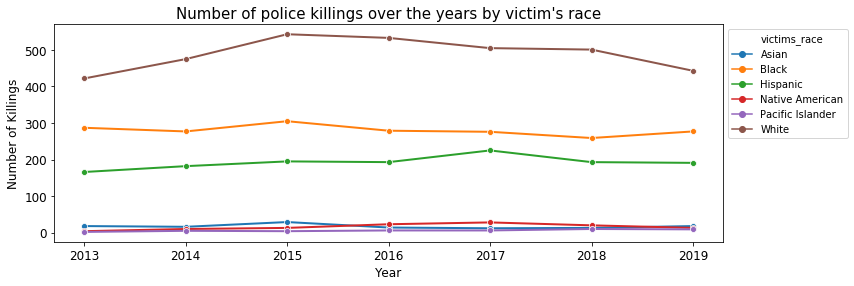

In [358]:
data = killings_f[killings_f.victims_race !="Unknown"].groupby(['victims_race',
                                                                'incident_year'],as_index=False)['victims_count'].sum()
plt.figure(figsize=(12,4))
ax = sns.lineplot(data = data, x = 'incident_year', y = 'victims_count', hue='victims_race',
                  markers= ['o'] * data.victims_race.nunique(),style = 'victims_race', dashes=False,linewidth=2)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Killings',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of police killings over the years by victim's race",fontsize=15)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig("output/q1_police_killings_by_years_and_race.png",dpi=400,bbox_inches='tight');

#### Observation
In the above line chart, we could see that the number of killings across the races has more or less remained constant between 2013 and 2019 albeit some minor fluctuations. The police killings spiked in 2015 across all races and since then has been on a gradual decline for Whites,whereas it has been more or less the same for Blacks and Hispanics. This indicates that despite the efforts in the recent years, the number of fatalities have not seen an improvement

Next, we look at the total police killings from 2013 to 2019 by races

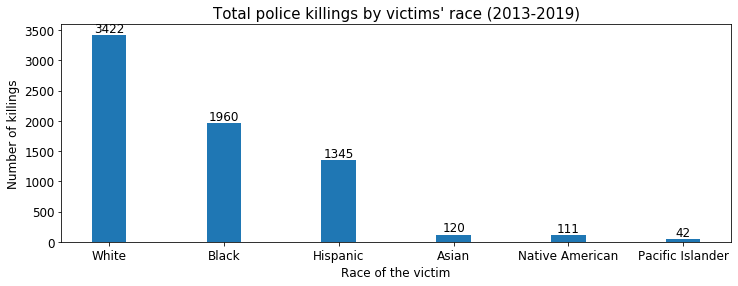

In [362]:
race_count = killings_f[killings_f.victims_race !="Unknown"].victims_race.value_counts()
plt.figure(figsize=(12,4))
plt.bar(x=race_count.index,height=race_count.values,width=0.3)
plt.xlabel('Race of the victim',fontsize=12)
plt.ylabel('Number of killings',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Total police killings by victims' race (2013-2019)",fontsize=15);

for x,y in zip(race_count.index,race_count.values):

    label = "{:d}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points", xytext=(0,3), ha='center',fontsize=12)

plt.savefig("output/q1_police_killings_by_race.png",dpi=400)
plt.show();

#### Observation

49% of all victims were White, followed by Blacks/African Americans (28%) and Hispanics(~19%). The victims from these three races are much higher than the other races, also reflective of the fact they are the three largest racial/ethnic groups in the US.

The below code does the following to prepare the data for chi square test:
* We group the number of police killings by race
* We merge the arrests estimates with the police killings on race
* We calculate the arrests proportion for each race
* We multiply the total victim count by the arrests proportion for each race to get the expected dsitribution
* We calculate the ratio of actual to expected for each race, and check the final table

In [361]:
killings_by_race = killings_f.groupby(['victims_race'],as_index=False)['victims_count'].sum()
killings_by_race_arrests = arrests_final.merge(killings_by_race,how="inner",left_on="race",right_on="victims_race")
killings_by_race_arrests = killings_by_race_arrests.rename({'id':'victims_count'},axis=1)
victims = killings_by_race_arrests.victims_count.sum()
killings_by_race_arrests['killings_proportion'] = killings_by_race_arrests.victims_count/victims
killings_by_race_arrests['expected_count'] = round(victims*killings_by_race_arrests.arrests_proportion).astype('int')
killings_by_race_arrests['actual/expected'] = killings_by_race_arrests.victims_count/killings_by_race_arrests.expected_count
killings_by_race_arrests

,race,arrests_count,arrests_proportion,victims_race,victims_count,killings_proportion,expected_count,actual/expected
0,White,3308679,0.561168,White,3422,0.488857,3928,0.871181
1,Black,1269901,0.215381,Black,1960,0.280000,1508,1.299735
2,Native American,115333,0.019561,Native American,111,0.015857,137,0.810219
3,Asian,60680,0.010292,Asian,120,0.017143,72,1.666667
4,Pacific Islander,14661,0.002487,Pacific Islander,42,0.006000,17,2.470588
5,Hispanic,1126806,0.191112,Hispanic,1345,0.192143,1338,1.005232


We export the final summary table as csv

In [365]:
killings_by_race_arrests.to_csv("output/q1_arrests_vs_killings_final.csv",index=False)

We now plot the proportion of killings vs. proportion of arrests for each race to see if the proportions are consistent across the races

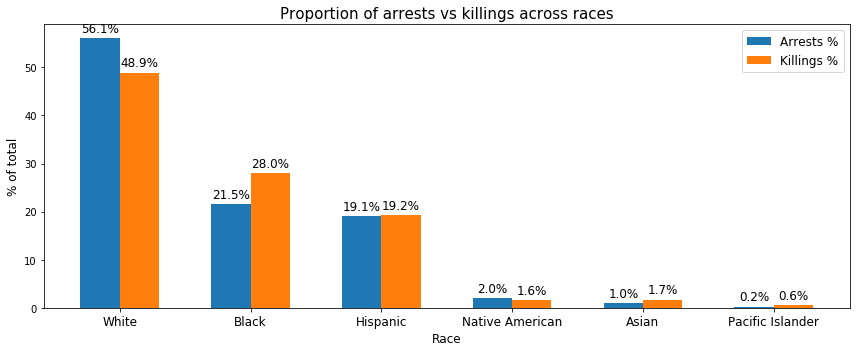

In [363]:
data = killings_by_race_arrests.sort_values('arrests_proportion',ascending=False)
labels, arrests_pct, victims_pct  = list(data.race), list(100*data.arrests_proportion), list(100*data.killings_proportion)

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(12,5))
rects1 = ax.bar(x - width/2, arrests_pct, width=0.3, label='Arrests %')
rects2 = ax.bar(x + width/2, victims_pct, width=0.3, label='Killings %')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of total',fontsize=12)
ax.set_xlabel('Race',fontsize=12)
ax.set_title('Proportion of arrests vs killings across races',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12)
ax.legend(fontsize=12)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  textcoords="offset points",ha='center', va='bottom',fontsize=12)
autolabel(rects1),autolabel(rects2)
fig.tight_layout()
plt.savefig("output/q1_killings_vs_arrests_prop_by_race.png",dpi=400)
plt.show();

#### Observation

We could observe that the proportion of killings is higher for Blacks, Asians and Pacific Islanders compared to the proportion of arrests, whereas for Whites, the proportion of killings is lower than that of arrests. This could indicate a potential racial disparity in the killings.

#### Hypothesis testing

In order to test the statistical significance of the differences, let us perform a chi-squared test to test the following null hypothesis:  
   *Rate of police killings across the races are consistent with the rate of crime arrests across the races*  
The test compares the actual victim counts vs expected victim counts for each race

In [86]:
chisquare(killings_by_race_arrests.victims_count,killings_by_race_arrests.expected_count)

Power_divergenceResult(statistic=274.39802143517227, pvalue=3.179482442590367e-57)

The p-value is significant with a very high chi squared value providing an evidence against the null hypothesis. We therefore **reject** the null hypothesis. This indicates that the minority individuals are killed disproportionately by the police and racial disparity is indeed evident.

The below plot looks at the actual vs. expected killings ratio for each race

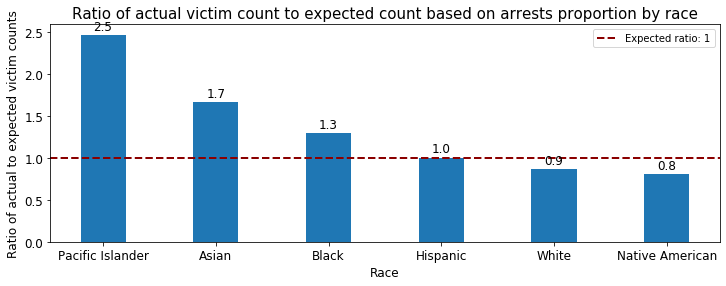

In [364]:
data = killings_by_race_arrests.sort_values('actual/expected',ascending=False)
plt.figure(figsize=(12,4))
plt.bar(x=data.race,height=data['actual/expected'],width=0.4)
plt.xlabel('Race',fontsize=12)
plt.ylabel('Ratio of actual to expected victim counts',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(1, color='darkred', linestyle='dashed',linewidth=2, label= f'Expected ratio: {1}')
plt.title('Ratio of actual victim count to expected count based on arrests proportion by race',fontsize=15);

for x,y in zip(data.race,data['actual/expected']):

    label = "{:.1f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points", xytext=(0,5), ha='center',fontsize=12)

plt.legend()
plt.savefig("output/q1_actual_vs_expected_ratio.png",dpi=400);

We observe that Pacific Islanders are killed at a rate 2.5 times higher than expected followed by Asians and Blacks at 1.7 times and 1.3 times respectively.

### 2. Are individuals in minority racial/ethnic groups likely to be killed by the police disproportionately when unarmed during an encounter?

To answer this question, we start off by looking at the composition of trends of police killings involving victims of varied threat level namely Armed, Unarmed, Vehicle or unclear

The below line plot looks at the trend of police killings for different armed status of the victims over the years

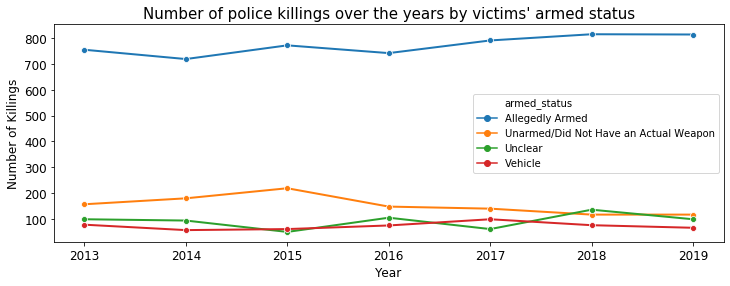

In [366]:
data=killings_f.groupby(['armed_status','incident_year'],as_index=False)['victims_count'].sum()
plt.figure(figsize=(12,4))
sns.lineplot(data = data, x = 'incident_year', y = 'victims_count', hue='armed_status',
            markers= ['o'] * data.armed_status.nunique(),style = 'armed_status', dashes=False,linewidth=2)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Killings',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of police killings over the years by victims' armed status",fontsize=15)
plt.savefig("output/q2_police_killings_by_years_and_armed_status.png",dpi=400);

#### Observation

We could observe that between 2013 and 2019, police killings involving armed victims has witnessed a rise while unarmed killings have gone down.After an initial spike in 2015, number of killings involving unarmed victims has seen a steady decline. This could indicate that efforts have been taken by the police in the recent years to mitigate unintended consequences during an encounter if the victim does not pose any threat.

The below plot looks at the total number of police killings by armed status of the victims between 2013 and 2019.

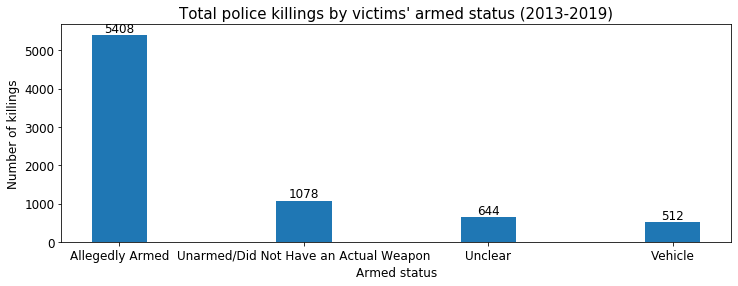

In [367]:
armed_status_count = killings_f['armed_status'].value_counts()
plt.figure(figsize=(12,4))
plt.bar(x=armed_status_count.index,height=armed_status_count.values,width=0.3)
plt.xlabel('Armed status',fontsize=12)
plt.ylabel('Number of killings',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Total police killings by victims' armed status (2013-2019)",fontsize=15);

for x,y in zip(armed_status_count.index,armed_status_count.values):

    label = "{:d}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points", xytext=(0,3), ha='center',fontsize=12)

plt.savefig("output/q2_police_killings_by_armed_status.png",dpi=400)
plt.show();

#### Observation

~71% of all police killings between 2013 and 2019 involved armed victims, while ~14% involved unarmed or did not have an actual weapon

We perform the following in the below code
* We pivot the table based on the armed status attribute and remove any killings where the race is Unknown and rename the armed status values
* We sum up Armed and Unarmed values to calculate the total killings and calculate the proportion for each race
* We mulitply the total unarmed killings count with the proportion pertaining to each race
* Since the value of Pacific Islanders is less than 5, it does not satisfy the chi-square criteria. So we group Pacific Islanders and Native Americans as 'Others' given the small counts for both these races
* We calculate the unarmed victims percentage for each race and get the ratio of actual to expected killings

In [368]:
killings_armed_status_pvt =killings_f.pivot_table(index=['victims_race'],columns=['armed_status'],
                                                  values='victims_count',aggfunc='sum').reset_index()
killings_armed_status_pvt = killings_armed_status_pvt[~killings_armed_status_pvt.victims_race.isin(['Unknown'])]
killings_armed_status_pvt = killings_armed_status_pvt.rename({'Unarmed/Did Not Have an Actual Weapon':'unarmed',
                                                             'Allegedly Armed':'armed'},axis=1)
killings_armed_status_pvt = killings_armed_status_pvt[['victims_race','armed','unarmed']]
killings_armed_status_pvt['total'] = killings_armed_status_pvt['armed'] + killings_armed_status_pvt['unarmed']

killings_armed_status_pvt['proportion'] = killings_armed_status_pvt.total/sum(killings_armed_status_pvt.total)

unarmed_total = sum(killings_armed_status_pvt.unarmed)

killings_armed_status_pvt['unarmed_expected']= round(killings_armed_status_pvt['proportion'] * unarmed_total).astype('int')

killings_armed_status_pvt['race']= np.where(killings_armed_status_pvt.victims_race =='Native American','Others',
                                             np.where(killings_armed_status_pvt.victims_race=='Pacific Islander','Others',
                                             killings_armed_status_pvt.victims_race))
killings_armed_unarmed_final = killings_armed_status_pvt.groupby(['race'],as_index=False).sum()
killings_armed_unarmed_final['unarmed_victims_ratio'] = 100*(killings_armed_unarmed_final.unarmed/killings_armed_unarmed_final.total)
killings_armed_unarmed_final['actual/expected'] = killings_armed_unarmed_final.unarmed/killings_armed_unarmed_final.unarmed_expected
killings_armed_unarmed_final

armed_status,race,armed,unarmed,total,proportion,unarmed_expected,unarmed_victims_ratio,actual/expected
0,Asian,95,12,107,0.017986,18,11.214953,0.666667
1,Black,1320,337,1657,0.278534,285,20.337960,1.182456
2,Hispanic,911,203,1114,0.187258,191,18.222621,1.062827
3,Others,105,14,119,0.020003,21,11.764706,0.666667
4,White,2496,456,2952,0.496218,507,15.447154,0.899408


We export the final summary table

In [370]:
killings_armed_unarmed_final.to_csv('output/q2_final.csv',index=False)

Below, we plot the percentage of victims by race that were unarmed during police encounters between 2013 and 2019

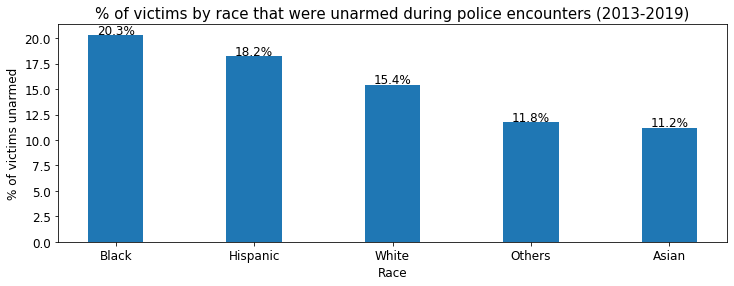

In [371]:
data = killings_armed_unarmed_final.sort_values('unarmed_victims_ratio',ascending=False)
plt.figure(figsize=(12,4))
plt.bar(x=data.race,height=data.unarmed_victims_ratio,width=0.4)
plt.xlabel('Race',fontsize=12)
plt.ylabel('% of victims unarmed',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('% of victims by race that were unarmed during police encounters (2013-2019)',fontsize=15);

for x,y in zip(data.race,data.unarmed_victims_ratio):

    label = "{:.1f}%".format(y)
    plt.annotate(label,(x,y), textcoords="offset points", xytext=(0,1), ha='center',fontsize=12)
plt.savefig("output/q2_unarmed_pct_killings_by_race.png",dpi=400)   
plt.show();

#### Observation

We could see that Blacks and Hispanics have the highest % of unarmed victims at 20.3% and 18.2% respectively. In other words, we could say that every 1 in 5 Blacks killed by the police was unarmed. This could indicate a potential bias by the police officers that they consider a black individual a threat even when the person is not carrying a weapon  

#### Hypothesis testing

In order to test the statistical significance of the differences, let us perform a chi-squared test to test the following null hypothesis:  
   *Rate of police killings involving unarmed victims across races are consistent with the rate of overall police killings across the races*  
The test compares the actual unarmed victim counts vs expected unarmed victim counts for each race

In [93]:
chisquare(killings_armed_unarmed_final.unarmed,killings_armed_unarmed_final.unarmed_expected)

Power_divergenceResult(statistic=19.705156847942526, pvalue=0.0005709689492094908)

The p-value is significant indicating an evidence against the null hypothesis. We can therefore say that individuals in minority groups are disproportionately killed by the police despite being unarmed

We now plot the ratio of actual to expected unarmed killings for each race

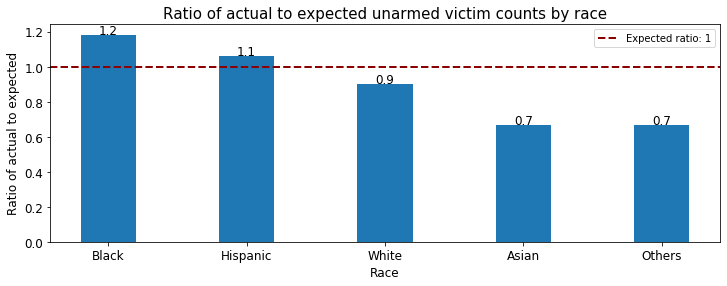

In [372]:
data = killings_armed_unarmed_final.sort_values('actual/expected',ascending=False)
plt.figure(figsize=(12,4))
plt.bar(x=data.race,height=data['actual/expected'],width=0.4)
plt.xlabel('Race',fontsize=12)
plt.ylabel('Ratio of actual to expected',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(1, color='darkred', linestyle='dashed',linewidth=2, label= f'Expected ratio: {1}')
plt.title('Ratio of actual to expected unarmed victim counts by race',fontsize=15);

for x,y in zip(data.race,data['actual/expected']):

    label = "{:.1f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points", xytext=(0,1), ha='center',fontsize=12)
plt.savefig("output/q2_actual_vs_expected_ratio.png",dpi=400)    
plt.legend();

### 3. Are individuals in minority racial/ethnic groups disproportionately killed by the police across the states?

In order to answer this question, we calculate a per capita metric that looks at the victim rate per million per year for each state and race. We then compare this metric across the states and races for any evidence of racial disparity

In the below code, we perform the following:

* We aggregate the killings data at a state level and state-race level
* We merge the killings state data and population estimates data at a state level and calculate the per capita metric. 
* Similarly, we merge the killings state-race data and population estimates at a state-race level and calculate the per capita metric

In [373]:
killings_by_state = killings_f.groupby(['state_name'],as_index=False)['victims_count'].sum()
killings_by_state_race = killings_f.groupby(['state_name','victims_race'],as_index=False)['victims_count'].sum()

summary_by_state = pop_est_by_state.merge(killings_by_state, how='inner',left_on='name',right_on='state_name')
summary_by_state['killings_per_mil_per_yr'] = (summary_by_state.victims_count/summary_by_state.popestimate2019)*(1000000/7)

summary_by_state_race = pop_est_by_state_race.merge(killings_by_state_race, how='inner',left_on=['name','race_name'],
                                                    right_on=['state_name','victims_race'])
summary_by_state_race['killings_per_mil_per_yr'] = (summary_by_state_race.victims_count/summary_by_state_race.popestimate2019)*(1000000/7)

We now plot the mean victim rate per million per year for each race and also compare them with the nation average

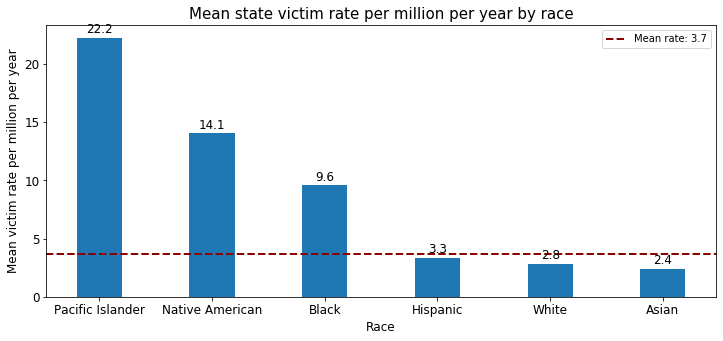

In [379]:
data = summary_by_state_race.groupby('race_name',as_index=False)['killings_per_mil_per_yr'].mean()
data = data.sort_values('killings_per_mil_per_yr',ascending=False)
state = (1000000/7)*np.mean(summary_by_state.victims_count/summary_by_state.popestimate2019)
plt.figure(figsize=(12,5))
plt.bar(x=data.race_name,height=data['killings_per_mil_per_yr'],width=0.4)
plt.xlabel('Race',fontsize=12)
plt.ylabel('Mean victim rate per million per year',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(state, color='darkred', linestyle='dashed',linewidth=2, label= f'Mean rate: {round(state,1)}')
plt.title('Mean state victim rate per million per year by race',fontsize=15);

for x,y in zip(data.race_name,data['killings_per_mil_per_yr']):

    label = "{:.1f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points", xytext=(0,5), ha='center',fontsize=12)
plt.savefig("output/q3_mean_victim_rate_per_capita_by_race.png",dpi=400)    
plt.legend();

#### Observation

We see that Pacific Islanders, Native Americans and Blacks are killed at a rate much higher than the national mean of 3.7. Across the states, on an average, a black person is killed at a rate ~3.5x as that of a white person every year. This suggests that there is a strong racial disparity in the police killings that is consistent across the states in the US.

Now that we know the victim rates are disproportionate across the states, we would like to see which states have the highest black-white disparity. For this, we first pivot the sumary table by race and then take the absolute difference of victim rates between black and white

In [377]:
state_race_pivot = summary_by_state_race.pivot_table(index='name',columns='race_name',values='killings_per_mil_per_yr',
                                                     aggfunc='max').reset_index().fillna(0)
state_race_pivot['bw_rate_difference'] = state_race_pivot.Black - state_race_pivot.White
state_race_pivot.head()

race_name,name,Asian,Black,Hispanic,Native American,Pacific Islander,White,bw_rate_difference
0,Alabama,1.982860,5.834161,0.000000,0.000000,0.000000,3.302717,2.531444
1,Alaska,0.000000,23.622512,2.971424,15.890230,0.000000,5.843120,17.779392
2,Arizona,0.000000,13.593874,7.366359,6.969102,0.000000,5.149064,8.444810
3,Arkansas,2.940173,9.519531,1.865146,0.000000,0.000000,3.942975,5.576556
4,California,1.070996,12.090389,4.640559,6.160063,8.779263,3.347654,8.742735


Export the summary table as csv

In [378]:
state_race_pivot.to_csv('output/q3_summary_by_state.csv',index=False)

We plot the top 10 states with the highest racial disparity in the police killings between black and white races

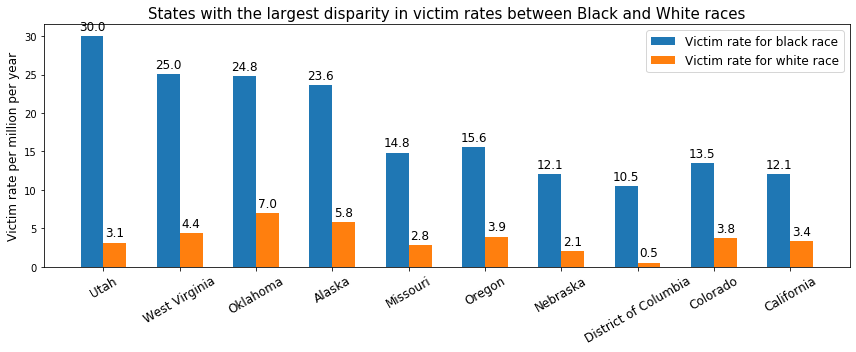

In [380]:
data = state_race_pivot.sort_values('bw_rate_difference',ascending=False)[:10]
labels, black_rate, white_rate  = list(data.name), round(data.Black,2), round(data.White,2)

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(12,5))
rects1 = ax.bar(x - width/2, black_rate, width=0.3, label='Victim rate for black race')
rects2 = ax.bar(x + width/2, white_rate, width=0.3, label='Victim rate for white race')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Victim rate per million per year',fontsize=12)
ax.set_xlabel('',fontsize=12)
ax.set_title('States with the largest disparity in victim rates between Black and White races',fontsize=15)
ax.set_xticks(x)
plt.xticks(rotation=30)
ax.set_xticklabels(labels,fontsize=12)
ax.legend(fontsize=12)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  textcoords="offset points",ha='center', va='bottom',fontsize=12)
autolabel(rects1),autolabel(rects2)

fig.tight_layout()
plt.savefig("output/q3_top_states_with_highest_bw_disparity.png",dpi=400)
plt.show();

#### Observation

In Utah, black people were ~10x as likely to be killed by police as white people, whereas in California the rate is ~3.5x. 44 of the 50 states have a higher killings rate /million for Black than White, suggesting a strong racial disparity

## Discussion <a class="anchor" id="dataprep"></a>

### Limitations

The arrests estimates provided by UCR is summarized by race and ethnicity. Not all agencies report the numbers for ethnicity as mentioned in the website because of which the totals for race and ethnicity do not match. Since I have used the summary for ethnicty instead of race in order to include Hispanic in my study, the data is not the most comprehemsive. However, as I have used only proportions and not absolute numbers in order to derive expected distribution, I believe this should not be of concern. To obtain the non-hispanic counts for each races, I used their arrests proportion and simply apportioned the total counts to each race. There might be better alternatives to get these counts which I did not explore during the course of this project.

### Implications

My second research question focused on whether individuals in minority groups are disproportionately killed by the police when unarmed. We did see a disparity in the police killings on Black and Hispanic individuals. This raises an important question of whether the police perceive a black or hispanic person to be hostile in general, even when they do not possess any weapon. This analysis along with the state level analysis can be used by the law enforcement agencies and policymakers to train police personnel to not resort to shootings or use of excessive force in such circumstances. Even though the number of unarmed killings has been on a decline, it is not slowing down as fast as one would expect and 117 deaths in 2019 is still alarming at a nation level.

While we observed a racial disparity in the police killings through our research questions, it has to be noted that the data is limited in terms of the number of atttributes we used given the scope of the project and time constraints. We cannot generalize it and conclusively say that police are biased against blacks or other minority groups. A holistic view on the isue of racial bias in policing requires additional data such as the income levels of the victims, the neighborhood where the incidents took place, the context in which the killings happened and list of all police encounters, not just the ones which resulted in a fatality. My next step would be to use all these factors as a future work, provided the data is available.

### Ethical considerations

While the police killings data has the name and gender of the victims, I made a conscious effort to not use these attributes anywhere in my analysis.

## Conclusion <a class="anchor" id="dataprep"></a>

We saw that given arrest rates as a benchmark, the distribution of the police killings across races were different from what an actual distribution would look like with a statistical significance suggesting racial disparity in the killings. Asians and Blacks are likely to be killed at a higher rate than what is expected. Similarly, we observed that the rates of police killings involving unarmed individuals across races were different from an expected distribution with a statistical significance indicating racial disparity. Blacks and Hispanics are likely to be killed at a higher rate by the police despite being unarmed. Based on victim rates per million of population, racial disparity in police killings is consistently observed across the states, with a black person likely to be killed at a much higher rate than a white person.